In [138]:
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [139]:
def ma_series(burnin: int, n: int, c: float, O: np.array, seed=None|int) -> np.array:
    """
    Generate a moving average series.

    Parameters
    ----------
    burnin : int
        The number of burn-in samples to generate.
    n : int
        The number of samples to generate.
    c : float
        The constant term in the moving average model.
    O : np.array
        The moving average coefficients.
    seed : int, optional
        The seed for the random number generator.

    Returns
    -------
    np.array
        The generated moving average series.

    Raises
    ------
    ValueError
        If the burn-in period is negative.
        If the number of samples is non-positive.
        If the constant term is not a number.
        If the moving average coefficients are not a numpy array.
        If the moving average coefficients are empty.
    """
    if burnin < 0:
        raise ValueError("The burn-in period must be a non-negative integer.")
    if n <= 0:
        raise ValueError("The number of samples must be a positive integer.")
    if not isinstance(c, (int, float)):
        raise ValueError("The constant term must be a number.")
    if not isinstance(O, np.ndarray):
        raise ValueError("The moving average coefficients must be a numpy array.")
    if len(O) == 0:
        raise ValueError("The moving average coefficients must not be empty.")
    
    if seed is not None:
        np.random.seed(seed)
    e = np.random.normal(0, 1, n + burnin)
    q = len(O)
    y = np.zeros(n + burnin)
    for t in range(n+burnin):
        y[t] = c + e[t] + np.sum([O[i] * e[t-i] for i in range(q) if t-i >= 0])

    print(f"MA model: y[t] = {c} +e[t] {' '.join([f'{O[i]:+}e[t-{i+1}]' for i in range(q)])}")
    return y[burnin:]

In [140]:
BURNIN = 500
N = 5000
SEED = 42

In [141]:
moving_average_series_1 = ma_series(BURNIN, N, 20, np.array([0.8]), seed=SEED)

MA model: y[t] = 20 +e[t] +0.8e[t-1]


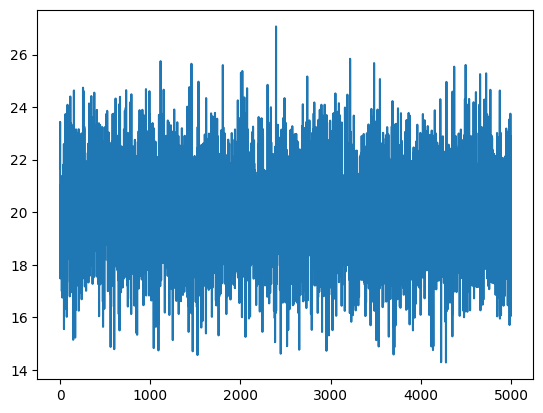

In [142]:
# plot the moving average series
plt.plot(moving_average_series_1)

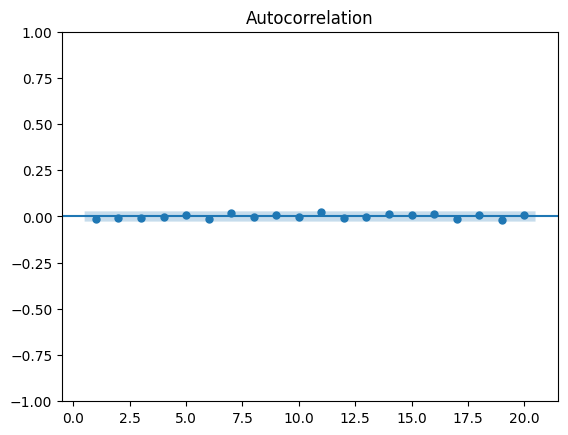

In [143]:
fig = plot_acf(moving_average_series_1, lags=20, zero=False)

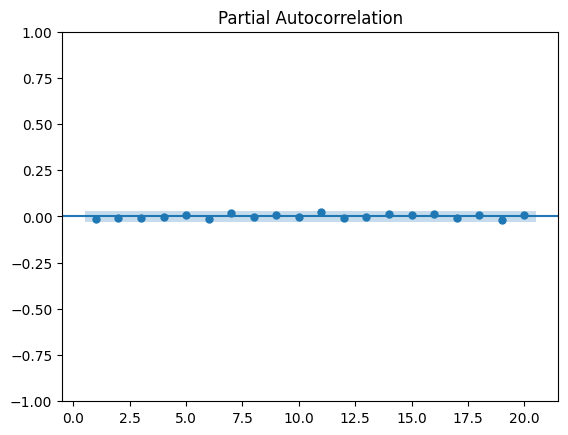

In [144]:
fig = plot_pacf(moving_average_series_1, lags=20, zero=False)

In [145]:
moving_average_series_2 = ma_series(BURNIN, N, 0, np.array([-1, 0.8]), seed=SEED)

MA model: y[t] = 0 +e[t] -1.0e[t-1] +0.8e[t-2]


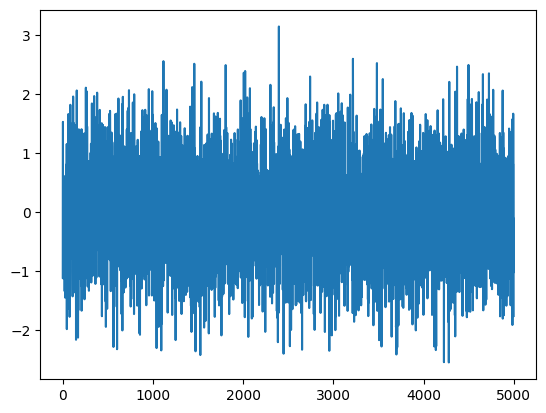

In [146]:
plt.plot(moving_average_series_2)

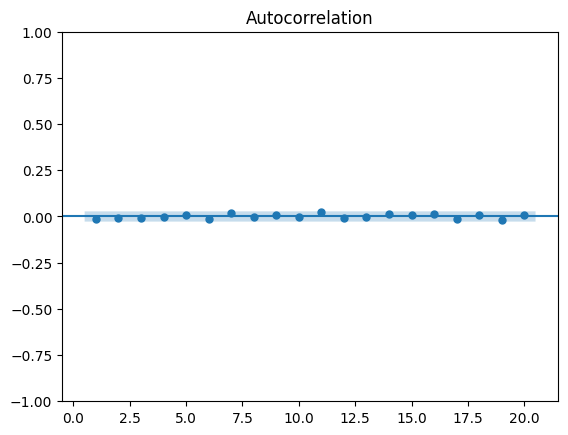

In [147]:
fig = plot_acf(moving_average_series_2, lags=20, zero=False)

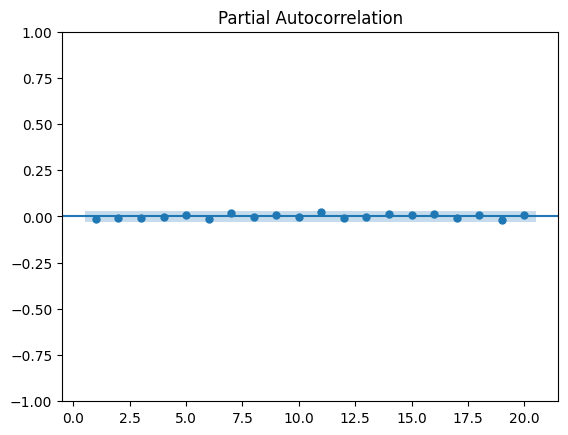

In [148]:
plot = plot_pacf(moving_average_series_2, lags=20, zero=False)